In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
tf.__version__

'2.3.1'

In [5]:
import kerastuner as kt

In [6]:
from kerastuner.tuners import RandomSearch

In [39]:
data = pd.read_csv('./ltfc/Real_Combine.csv')

In [40]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [41]:
data.dropna(inplace=True)

In [42]:
y=data.pop('PM 2.5')

In [43]:
X=data.copy()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state= 2)

# hyperperameter:
1. how many hidden layers model should have
2. neuron
3. leraning rate

In [12]:
def build_model(hp):
    model = Sequential()
    for i in range (hp.Int('num_layers',2,20)):
        model.add(Dense(units = hp.Int('units_'+str(i), min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation ='linear'))
    model.compile(
    optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),                    #choice chooses between hethe given values
    loss= 'mean_absolute_error',
    metrics = ['mean_absolute_error'])
    return model  #INT try with different values itself

In [18]:
tuner = RandomSearch(build_model,
                     objective ='val_mean_absolute_error',
                     max_trials=5,
                     executions_per_trial =3,
                     directory ='project3',
                     project_name = 'Air_Quality_Index')

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [20]:
tuner.search(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

Trial 5 Complete [00h 01m 46s]
val_mean_absolute_error: 39.874132792154946

Best val_mean_absolute_error So Far: 39.37686538696289
Total elapsed time: 00h 07m 15s
INFO:tensorflow:Oracle triggered exit


In [38]:
tuner.results_summary()

Results summary
Results in project1\Air_Quality_Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 128
units_1: 128
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 46.614322662353516
Trial summary
Hyperparameters:
num_layers: 10
units_0: 384
units_1: 384
learning_rate: 0.01
units_2: 128
units_3: 192
units_4: 64
units_5: 224
units_6: 192
units_7: 320
units_8: 320
units_9: 320
units_10: 448
units_11: 128
units_12: 224
units_13: 256
units_14: 416
units_15: 480
Score: 47.26721064249674
Trial summary
Hyperparameters:
num_layers: 4
units_0: 288
units_1: 288
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 64
units_5: 320
units_6: 480
units_7: 96
units_8: 448
units_9: 96
units_10: 64
units_11: 32
units_12: 288
units_13: 64
units_14: 128
units_15: 64
Score: 62.68621317545573
Trial summary
Hyperparameters:
num_layers: 16
units_0: 64
units_1: 256
lea

In [29]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1, activation='linear')
  ])

  model.compile(loss= 'mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

In [30]:
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing

In [45]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [46]:
hot3_model = build_and_compile_model(normalizer)

In [47]:
%%time
history = hot3_model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    batch_size=10,
    verbose=2, epochs=2000)

Epoch 1/2000
88/88 - 1s - loss: 57.0748 - val_loss: 39.4044
Epoch 2/2000
88/88 - 0s - loss: 41.0780 - val_loss: 75.3397
Epoch 3/2000
88/88 - 0s - loss: 47.0113 - val_loss: 36.2762
Epoch 4/2000
88/88 - 0s - loss: 38.9756 - val_loss: 37.1899
Epoch 5/2000
88/88 - 0s - loss: 40.2360 - val_loss: 36.1489
Epoch 6/2000
88/88 - 0s - loss: 40.3351 - val_loss: 36.9918
Epoch 7/2000
88/88 - 0s - loss: 39.5361 - val_loss: 45.0187
Epoch 8/2000
88/88 - 0s - loss: 39.2966 - val_loss: 36.4444
Epoch 9/2000
88/88 - 0s - loss: 37.6879 - val_loss: 34.2522
Epoch 10/2000
88/88 - 0s - loss: 37.2105 - val_loss: 35.6137
Epoch 11/2000
88/88 - 0s - loss: 37.9288 - val_loss: 37.4688
Epoch 12/2000
88/88 - 0s - loss: 38.3680 - val_loss: 33.2740
Epoch 13/2000
88/88 - 0s - loss: 35.4881 - val_loss: 34.1345
Epoch 14/2000
88/88 - 0s - loss: 37.1514 - val_loss: 34.4810
Epoch 15/2000
88/88 - 0s - loss: 38.3104 - val_loss: 42.4100
Epoch 16/2000
88/88 - 0s - loss: 38.4832 - val_loss: 39.9388
Epoch 17/2000
88/88 - 0s - loss: 

Epoch 135/2000
88/88 - 0s - loss: 20.0039 - val_loss: 29.1728
Epoch 136/2000
88/88 - 0s - loss: 23.9772 - val_loss: 30.3565
Epoch 137/2000
88/88 - 0s - loss: 20.8260 - val_loss: 27.9668
Epoch 138/2000
88/88 - 0s - loss: 20.2109 - val_loss: 28.0189
Epoch 139/2000
88/88 - 0s - loss: 19.8530 - val_loss: 27.6545
Epoch 140/2000
88/88 - 0s - loss: 20.4484 - val_loss: 27.3803
Epoch 141/2000
88/88 - 0s - loss: 21.3190 - val_loss: 29.8756
Epoch 142/2000
88/88 - 0s - loss: 21.2371 - val_loss: 28.0162
Epoch 143/2000
88/88 - 0s - loss: 20.5448 - val_loss: 28.9441
Epoch 144/2000
88/88 - 0s - loss: 20.5508 - val_loss: 28.6009
Epoch 145/2000
88/88 - 0s - loss: 22.1303 - val_loss: 28.6462
Epoch 146/2000
88/88 - 0s - loss: 20.1201 - val_loss: 27.0416
Epoch 147/2000
88/88 - 0s - loss: 19.1423 - val_loss: 26.0680
Epoch 148/2000
88/88 - 0s - loss: 19.2970 - val_loss: 29.3256
Epoch 149/2000
88/88 - 0s - loss: 20.7924 - val_loss: 29.5490
Epoch 150/2000
88/88 - 0s - loss: 21.4910 - val_loss: 26.8393
Epoch 15

88/88 - 0s - loss: 15.6584 - val_loss: 24.5892
Epoch 268/2000
88/88 - 0s - loss: 16.6594 - val_loss: 27.2847
Epoch 269/2000
88/88 - 0s - loss: 17.4602 - val_loss: 26.0300
Epoch 270/2000
88/88 - 0s - loss: 16.9695 - val_loss: 23.4663
Epoch 271/2000
88/88 - 0s - loss: 17.0149 - val_loss: 27.2515
Epoch 272/2000
88/88 - 0s - loss: 16.0696 - val_loss: 24.1203
Epoch 273/2000
88/88 - 0s - loss: 15.9222 - val_loss: 22.0385
Epoch 274/2000
88/88 - 0s - loss: 16.2526 - val_loss: 24.8044
Epoch 275/2000
88/88 - 0s - loss: 16.7414 - val_loss: 24.3599
Epoch 276/2000
88/88 - 0s - loss: 16.7360 - val_loss: 24.8956
Epoch 277/2000
88/88 - 0s - loss: 17.3591 - val_loss: 22.2983
Epoch 278/2000
88/88 - 0s - loss: 15.3271 - val_loss: 23.6285
Epoch 279/2000
88/88 - 0s - loss: 15.3231 - val_loss: 22.7687
Epoch 280/2000
88/88 - 0s - loss: 15.5865 - val_loss: 23.9898
Epoch 281/2000
88/88 - 0s - loss: 14.4031 - val_loss: 22.7900
Epoch 282/2000
88/88 - 0s - loss: 16.0258 - val_loss: 22.6764
Epoch 283/2000
88/88 - 

Epoch 400/2000
88/88 - 0s - loss: 17.0831 - val_loss: 24.6332
Epoch 401/2000
88/88 - 0s - loss: 15.4350 - val_loss: 23.4245
Epoch 402/2000
88/88 - 0s - loss: 14.5101 - val_loss: 22.3624
Epoch 403/2000
88/88 - 0s - loss: 18.8160 - val_loss: 26.2459
Epoch 404/2000
88/88 - 0s - loss: 17.0400 - val_loss: 24.1255
Epoch 405/2000
88/88 - 0s - loss: 15.2039 - val_loss: 23.8860
Epoch 406/2000
88/88 - 0s - loss: 16.3697 - val_loss: 24.3076
Epoch 407/2000
88/88 - 0s - loss: 15.1393 - val_loss: 25.4759
Epoch 408/2000
88/88 - 0s - loss: 15.6333 - val_loss: 23.6864
Epoch 409/2000
88/88 - 0s - loss: 15.2126 - val_loss: 22.6494
Epoch 410/2000
88/88 - 0s - loss: 14.2712 - val_loss: 24.6984
Epoch 411/2000
88/88 - 0s - loss: 14.4748 - val_loss: 21.7625
Epoch 412/2000
88/88 - 0s - loss: 13.1963 - val_loss: 22.5988
Epoch 413/2000
88/88 - 0s - loss: 13.4779 - val_loss: 22.8354
Epoch 414/2000
88/88 - 0s - loss: 15.2566 - val_loss: 21.9645
Epoch 415/2000
88/88 - 0s - loss: 13.1432 - val_loss: 23.0727
Epoch 41

88/88 - 0s - loss: 12.8506 - val_loss: 23.3402
Epoch 533/2000
88/88 - 0s - loss: 15.0502 - val_loss: 25.8222
Epoch 534/2000
88/88 - 0s - loss: 14.0206 - val_loss: 23.5545
Epoch 535/2000
88/88 - 0s - loss: 12.7257 - val_loss: 24.1258
Epoch 536/2000
88/88 - 0s - loss: 13.1102 - val_loss: 23.2450
Epoch 537/2000
88/88 - 0s - loss: 13.1382 - val_loss: 26.6036
Epoch 538/2000
88/88 - 0s - loss: 12.4331 - val_loss: 21.6030
Epoch 539/2000
88/88 - 0s - loss: 12.0009 - val_loss: 22.8237
Epoch 540/2000
88/88 - 0s - loss: 11.8077 - val_loss: 21.2678
Epoch 541/2000
88/88 - 0s - loss: 12.2880 - val_loss: 23.0085
Epoch 542/2000
88/88 - 0s - loss: 12.2907 - val_loss: 21.3142
Epoch 543/2000
88/88 - 0s - loss: 12.5548 - val_loss: 23.9836
Epoch 544/2000
88/88 - 0s - loss: 12.8733 - val_loss: 23.4766
Epoch 545/2000
88/88 - 0s - loss: 12.6266 - val_loss: 23.7548
Epoch 546/2000
88/88 - 0s - loss: 12.7207 - val_loss: 22.1881
Epoch 547/2000
88/88 - 0s - loss: 12.4333 - val_loss: 21.7617
Epoch 548/2000
88/88 - 

Epoch 665/2000
88/88 - 0s - loss: 10.6863 - val_loss: 21.6621
Epoch 666/2000
88/88 - 0s - loss: 11.0250 - val_loss: 22.6044
Epoch 667/2000
88/88 - 0s - loss: 11.6398 - val_loss: 23.5096
Epoch 668/2000
88/88 - 0s - loss: 11.7260 - val_loss: 22.6128
Epoch 669/2000
88/88 - 0s - loss: 11.6666 - val_loss: 22.9972
Epoch 670/2000
88/88 - 0s - loss: 11.6391 - val_loss: 22.4225
Epoch 671/2000
88/88 - 0s - loss: 10.8964 - val_loss: 20.6489
Epoch 672/2000
88/88 - 0s - loss: 11.6848 - val_loss: 20.6785
Epoch 673/2000
88/88 - 0s - loss: 13.0905 - val_loss: 21.5193
Epoch 674/2000
88/88 - 0s - loss: 12.1534 - val_loss: 22.4701
Epoch 675/2000
88/88 - 0s - loss: 11.0865 - val_loss: 21.7900
Epoch 676/2000
88/88 - 0s - loss: 11.8774 - val_loss: 22.1776
Epoch 677/2000
88/88 - 0s - loss: 12.0948 - val_loss: 20.6719
Epoch 678/2000
88/88 - 0s - loss: 11.8966 - val_loss: 23.3754
Epoch 679/2000
88/88 - 0s - loss: 13.0759 - val_loss: 21.3295
Epoch 680/2000
88/88 - 0s - loss: 11.7973 - val_loss: 23.2327
Epoch 68

88/88 - 0s - loss: 13.5466 - val_loss: 23.1230
Epoch 798/2000
88/88 - 0s - loss: 12.9675 - val_loss: 24.5267
Epoch 799/2000
88/88 - 0s - loss: 12.9071 - val_loss: 22.3658
Epoch 800/2000
88/88 - 0s - loss: 12.6913 - val_loss: 23.0830
Epoch 801/2000
88/88 - 0s - loss: 12.9754 - val_loss: 22.2462
Epoch 802/2000
88/88 - 0s - loss: 14.0457 - val_loss: 23.1072
Epoch 803/2000
88/88 - 0s - loss: 11.9056 - val_loss: 21.7956
Epoch 804/2000
88/88 - 0s - loss: 11.9086 - val_loss: 23.8639
Epoch 805/2000
88/88 - 0s - loss: 13.2370 - val_loss: 23.7218
Epoch 806/2000
88/88 - 0s - loss: 12.4334 - val_loss: 24.0324
Epoch 807/2000
88/88 - 0s - loss: 11.5863 - val_loss: 22.9526
Epoch 808/2000
88/88 - 0s - loss: 11.5065 - val_loss: 22.6724
Epoch 809/2000
88/88 - 0s - loss: 13.0170 - val_loss: 23.0484
Epoch 810/2000
88/88 - 0s - loss: 11.1775 - val_loss: 22.9998
Epoch 811/2000
88/88 - 0s - loss: 13.6802 - val_loss: 30.2194
Epoch 812/2000
88/88 - 0s - loss: 18.8476 - val_loss: 24.4853
Epoch 813/2000
88/88 - 

Epoch 930/2000
88/88 - 0s - loss: 9.5577 - val_loss: 19.0993
Epoch 931/2000
88/88 - 0s - loss: 10.3461 - val_loss: 20.1224
Epoch 932/2000
88/88 - 0s - loss: 11.9449 - val_loss: 21.6067
Epoch 933/2000
88/88 - 0s - loss: 12.6918 - val_loss: 20.4060
Epoch 934/2000
88/88 - 0s - loss: 11.6158 - val_loss: 20.0440
Epoch 935/2000
88/88 - 0s - loss: 10.3068 - val_loss: 20.2821
Epoch 936/2000
88/88 - 0s - loss: 10.0921 - val_loss: 19.1228
Epoch 937/2000
88/88 - 0s - loss: 11.4455 - val_loss: 20.3441
Epoch 938/2000
88/88 - 0s - loss: 12.2611 - val_loss: 21.5767
Epoch 939/2000
88/88 - 0s - loss: 11.6621 - val_loss: 20.2643
Epoch 940/2000
88/88 - 0s - loss: 10.1351 - val_loss: 19.2017
Epoch 941/2000
88/88 - 0s - loss: 9.9923 - val_loss: 20.7467
Epoch 942/2000
88/88 - 0s - loss: 10.3741 - val_loss: 19.6781
Epoch 943/2000
88/88 - 0s - loss: 9.7941 - val_loss: 20.0788
Epoch 944/2000
88/88 - 0s - loss: 10.3370 - val_loss: 19.6518
Epoch 945/2000
88/88 - 0s - loss: 10.7526 - val_loss: 20.4164
Epoch 946/2

88/88 - 0s - loss: 10.2928 - val_loss: 21.9436
Epoch 1063/2000
88/88 - 0s - loss: 8.8853 - val_loss: 21.2076
Epoch 1064/2000
88/88 - 0s - loss: 8.9635 - val_loss: 20.0308
Epoch 1065/2000
88/88 - 0s - loss: 8.3289 - val_loss: 20.7325
Epoch 1066/2000
88/88 - 0s - loss: 8.5314 - val_loss: 21.0429
Epoch 1067/2000
88/88 - 0s - loss: 8.9994 - val_loss: 21.1385
Epoch 1068/2000
88/88 - 0s - loss: 9.1593 - val_loss: 20.6730
Epoch 1069/2000
88/88 - 0s - loss: 8.4131 - val_loss: 20.7743
Epoch 1070/2000
88/88 - 0s - loss: 8.8012 - val_loss: 21.9030
Epoch 1071/2000
88/88 - 0s - loss: 8.8140 - val_loss: 19.8341
Epoch 1072/2000
88/88 - 0s - loss: 7.9635 - val_loss: 20.0873
Epoch 1073/2000
88/88 - 0s - loss: 8.4316 - val_loss: 21.4342
Epoch 1074/2000
88/88 - 0s - loss: 8.5068 - val_loss: 20.9659
Epoch 1075/2000
88/88 - 0s - loss: 10.1102 - val_loss: 21.1303
Epoch 1076/2000
88/88 - 0s - loss: 8.5900 - val_loss: 21.8659
Epoch 1077/2000
88/88 - 0s - loss: 8.8565 - val_loss: 20.1834
Epoch 1078/2000
88/88 

88/88 - 0s - loss: 10.3525 - val_loss: 19.9315
Epoch 1195/2000
88/88 - 0s - loss: 9.1377 - val_loss: 20.7339
Epoch 1196/2000
88/88 - 0s - loss: 8.7614 - val_loss: 20.3191
Epoch 1197/2000
88/88 - 0s - loss: 9.0770 - val_loss: 20.2807
Epoch 1198/2000
88/88 - 0s - loss: 8.4524 - val_loss: 19.7102
Epoch 1199/2000
88/88 - 0s - loss: 8.4555 - val_loss: 19.9026
Epoch 1200/2000
88/88 - 0s - loss: 8.3683 - val_loss: 19.9766
Epoch 1201/2000
88/88 - 0s - loss: 8.5737 - val_loss: 21.2463
Epoch 1202/2000
88/88 - 0s - loss: 8.5552 - val_loss: 22.3320
Epoch 1203/2000
88/88 - 0s - loss: 9.2333 - val_loss: 21.9557
Epoch 1204/2000
88/88 - 0s - loss: 8.8280 - val_loss: 20.2196
Epoch 1205/2000
88/88 - 0s - loss: 8.3210 - val_loss: 22.1579
Epoch 1206/2000
88/88 - 0s - loss: 8.9970 - val_loss: 21.0998
Epoch 1207/2000
88/88 - 0s - loss: 9.2270 - val_loss: 20.4827
Epoch 1208/2000
88/88 - 0s - loss: 9.2162 - val_loss: 21.8460
Epoch 1209/2000
88/88 - 0s - loss: 8.5444 - val_loss: 20.1629
Epoch 1210/2000
88/88 -

88/88 - 0s - loss: 9.0880 - val_loss: 18.9533
Epoch 1327/2000
88/88 - 0s - loss: 7.1649 - val_loss: 18.5252
Epoch 1328/2000
88/88 - 0s - loss: 7.1410 - val_loss: 19.9931
Epoch 1329/2000
88/88 - 0s - loss: 8.6593 - val_loss: 19.4164
Epoch 1330/2000
88/88 - 0s - loss: 7.8242 - val_loss: 20.1871
Epoch 1331/2000
88/88 - 0s - loss: 8.2771 - val_loss: 20.8779
Epoch 1332/2000
88/88 - 0s - loss: 7.9698 - val_loss: 20.4842
Epoch 1333/2000
88/88 - 0s - loss: 8.5935 - val_loss: 20.3556
Epoch 1334/2000
88/88 - 0s - loss: 7.6656 - val_loss: 18.8752
Epoch 1335/2000
88/88 - 0s - loss: 7.9781 - val_loss: 20.2713
Epoch 1336/2000
88/88 - 0s - loss: 7.7039 - val_loss: 19.6343
Epoch 1337/2000
88/88 - 0s - loss: 7.8889 - val_loss: 21.1035
Epoch 1338/2000
88/88 - 0s - loss: 7.5010 - val_loss: 21.3060
Epoch 1339/2000
88/88 - 0s - loss: 8.4726 - val_loss: 22.5921
Epoch 1340/2000
88/88 - 0s - loss: 11.4826 - val_loss: 20.1624
Epoch 1341/2000
88/88 - 0s - loss: 9.5530 - val_loss: 21.1237
Epoch 1342/2000
88/88 -

88/88 - 0s - loss: 8.7648 - val_loss: 20.2978
Epoch 1459/2000
88/88 - 0s - loss: 7.6813 - val_loss: 20.5951
Epoch 1460/2000
88/88 - 0s - loss: 7.9361 - val_loss: 19.4545
Epoch 1461/2000
88/88 - 0s - loss: 7.4691 - val_loss: 20.1883
Epoch 1462/2000
88/88 - 0s - loss: 8.9439 - val_loss: 20.9603
Epoch 1463/2000
88/88 - 0s - loss: 7.9593 - val_loss: 21.3916
Epoch 1464/2000
88/88 - 0s - loss: 8.1992 - val_loss: 19.5721
Epoch 1465/2000
88/88 - 0s - loss: 8.5060 - val_loss: 20.2122
Epoch 1466/2000
88/88 - 0s - loss: 8.4819 - val_loss: 19.6453
Epoch 1467/2000
88/88 - 0s - loss: 7.6257 - val_loss: 21.3091
Epoch 1468/2000
88/88 - 0s - loss: 7.9869 - val_loss: 19.6371
Epoch 1469/2000
88/88 - 0s - loss: 7.6214 - val_loss: 20.7666
Epoch 1470/2000
88/88 - 0s - loss: 7.9726 - val_loss: 21.0019
Epoch 1471/2000
88/88 - 0s - loss: 8.5002 - val_loss: 20.0272
Epoch 1472/2000
88/88 - 0s - loss: 8.1831 - val_loss: 20.2681
Epoch 1473/2000
88/88 - 0s - loss: 7.9392 - val_loss: 20.1759
Epoch 1474/2000
88/88 - 

Epoch 1590/2000
88/88 - 0s - loss: 11.4593 - val_loss: 20.7306
Epoch 1591/2000
88/88 - 0s - loss: 9.3807 - val_loss: 19.9339
Epoch 1592/2000
88/88 - 0s - loss: 9.5429 - val_loss: 19.6010
Epoch 1593/2000
88/88 - 0s - loss: 8.6165 - val_loss: 18.6894
Epoch 1594/2000
88/88 - 0s - loss: 8.8003 - val_loss: 20.8838
Epoch 1595/2000
88/88 - 0s - loss: 9.4509 - val_loss: 20.6424
Epoch 1596/2000
88/88 - 0s - loss: 9.8728 - val_loss: 20.7014
Epoch 1597/2000
88/88 - 0s - loss: 11.3322 - val_loss: 22.0492
Epoch 1598/2000
88/88 - 0s - loss: 10.7502 - val_loss: 20.2825
Epoch 1599/2000
88/88 - 0s - loss: 10.0653 - val_loss: 20.3891
Epoch 1600/2000
88/88 - 0s - loss: 9.5712 - val_loss: 21.8687
Epoch 1601/2000
88/88 - 0s - loss: 9.5540 - val_loss: 19.7246
Epoch 1602/2000
88/88 - 0s - loss: 9.3006 - val_loss: 20.6139
Epoch 1603/2000
88/88 - 0s - loss: 9.4673 - val_loss: 19.6959
Epoch 1604/2000
88/88 - 0s - loss: 8.6443 - val_loss: 19.5603
Epoch 1605/2000
88/88 - 0s - loss: 7.9313 - val_loss: 19.6957
Epoc

Epoch 1722/2000
88/88 - 0s - loss: 8.9066 - val_loss: 20.4999
Epoch 1723/2000
88/88 - 0s - loss: 7.9962 - val_loss: 19.5728
Epoch 1724/2000
88/88 - 0s - loss: 7.7685 - val_loss: 20.3432
Epoch 1725/2000
88/88 - 0s - loss: 8.4359 - val_loss: 20.7409
Epoch 1726/2000
88/88 - 0s - loss: 8.3512 - val_loss: 20.6134
Epoch 1727/2000
88/88 - 0s - loss: 7.4494 - val_loss: 20.1532
Epoch 1728/2000
88/88 - 0s - loss: 6.9614 - val_loss: 20.5651
Epoch 1729/2000
88/88 - 0s - loss: 6.7988 - val_loss: 21.1379
Epoch 1730/2000
88/88 - 0s - loss: 7.6455 - val_loss: 19.6471
Epoch 1731/2000
88/88 - 0s - loss: 8.0640 - val_loss: 19.7680
Epoch 1732/2000
88/88 - 0s - loss: 8.1360 - val_loss: 19.0046
Epoch 1733/2000
88/88 - 0s - loss: 6.9301 - val_loss: 19.4806
Epoch 1734/2000
88/88 - 0s - loss: 7.3416 - val_loss: 19.6852
Epoch 1735/2000
88/88 - 0s - loss: 7.8371 - val_loss: 19.8553
Epoch 1736/2000
88/88 - 0s - loss: 6.9627 - val_loss: 20.6937
Epoch 1737/2000
88/88 - 0s - loss: 7.3835 - val_loss: 20.2974
Epoch 17

Epoch 1854/2000
88/88 - 0s - loss: 11.3125 - val_loss: 21.7657
Epoch 1855/2000
88/88 - 0s - loss: 10.2044 - val_loss: 23.8376
Epoch 1856/2000
88/88 - 0s - loss: 10.4586 - val_loss: 21.8760
Epoch 1857/2000
88/88 - 0s - loss: 9.5269 - val_loss: 22.4703
Epoch 1858/2000
88/88 - 0s - loss: 9.5930 - val_loss: 21.4645
Epoch 1859/2000
88/88 - 0s - loss: 9.1208 - val_loss: 20.8995
Epoch 1860/2000
88/88 - 0s - loss: 9.1439 - val_loss: 23.1323
Epoch 1861/2000
88/88 - 0s - loss: 11.0832 - val_loss: 23.8160
Epoch 1862/2000
88/88 - 0s - loss: 10.8839 - val_loss: 22.3100
Epoch 1863/2000
88/88 - 0s - loss: 10.0004 - val_loss: 20.9933
Epoch 1864/2000
88/88 - 0s - loss: 9.6609 - val_loss: 20.7848
Epoch 1865/2000
88/88 - 0s - loss: 8.8868 - val_loss: 20.3571
Epoch 1866/2000
88/88 - 0s - loss: 9.3302 - val_loss: 21.6734
Epoch 1867/2000
88/88 - 0s - loss: 11.3000 - val_loss: 22.6254
Epoch 1868/2000
88/88 - 0s - loss: 10.8853 - val_loss: 22.7650
Epoch 1869/2000
88/88 - 0s - loss: 10.5184 - val_loss: 21.5007

Epoch 1985/2000
88/88 - 0s - loss: 10.4640 - val_loss: 22.3299
Epoch 1986/2000
88/88 - 0s - loss: 10.4346 - val_loss: 22.7256
Epoch 1987/2000
88/88 - 0s - loss: 10.2585 - val_loss: 24.3667
Epoch 1988/2000
88/88 - 0s - loss: 10.6169 - val_loss: 22.2753
Epoch 1989/2000
88/88 - 0s - loss: 10.6670 - val_loss: 24.1983
Epoch 1990/2000
88/88 - 0s - loss: 9.6127 - val_loss: 21.8441
Epoch 1991/2000
88/88 - 0s - loss: 9.4648 - val_loss: 22.7996
Epoch 1992/2000
88/88 - 0s - loss: 9.8195 - val_loss: 22.5394
Epoch 1993/2000
88/88 - 0s - loss: 9.3472 - val_loss: 21.7527
Epoch 1994/2000
88/88 - 0s - loss: 9.7130 - val_loss: 22.3592
Epoch 1995/2000
88/88 - 0s - loss: 10.2642 - val_loss: 22.3180
Epoch 1996/2000
88/88 - 0s - loss: 9.2162 - val_loss: 23.2719
Epoch 1997/2000
88/88 - 0s - loss: 9.7671 - val_loss: 22.1799
Epoch 1998/2000
88/88 - 0s - loss: 9.4147 - val_loss: 21.9639
Epoch 1999/2000
88/88 - 0s - loss: 10.0787 - val_loss: 22.0180
Epoch 2000/2000
88/88 - 0s - loss: 9.8199 - val_loss: 24.3402
W

In [49]:
def printLoss(loss_type, loss):
  MEAN = np.mean(loss)
  STD_DEV = np.std(loss)
  MIN = np.min(loss)
  MAX = np.max(loss)
  print(str(loss_type))
  print("\t Max: =", MAX)
  print("\t Min: =", MIN)
  print("\t Mean: =", MEAN)

In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
training_loss = history.history['loss']
printLoss("Training Loss:", training_loss)

Training Loss:
	 Max: = 57.07482147216797
	 Min: = 6.460926532745361
	 Mean: = 12.472197850942612


In [51]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

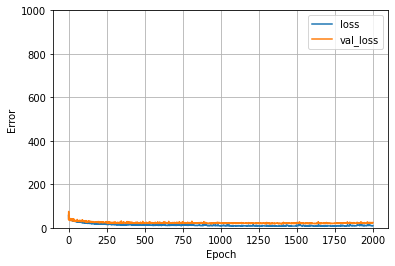

In [57]:
plot_loss(history)

In [60]:
test_results = {}
test_results['hot3_model'] = hot3_model.evaluate(X_test, y_test, verbose=1)
print (test_results)

7/7 [==============================] - 0s 2ms/step - loss: 24.3402
{'hot3_model': 24.340234756469727}


In [61]:
y_pred =hot3_model.predict(X_test)

In [77]:
T = pd.DataFrame(X_test['T'])

In [87]:
air_quality_pred = pd.DataFrame(y_pred)

In [88]:
finalCSV = pd.concat([T,air_quality_pred], axis=1)

In [90]:
finalCSV.columns = ['T', 'air_quality_pm2.5']

In [91]:
finalCSV.to_csv('./ltfc/PM2.5.csv')